# Exploratory Data Analysis (EDA)
## LEGO Secondary Market Investment Analysis

### Purpose of This Notebook

The purpose of this exploratory data analysis (EDA) is to understand the structure, quality, and behavior of the LEGO dataset prior to any cleaning or modeling. This analysis examines:

- Dataset size and structure
- Missing values and data quality issues
- Distributions of key variables
- Relationships between LEGO set characteristics and aftermarket performance
- Presence of skewness, extreme values, and nonlinearity

The findings from this EDA notebook are used for the data preparation steps implemented in `make_dataset.py` and guide the selection of modeling techniques used later in the project.


The first code cell will import the libraries needed for exploratory data analysis. This cell aslo sets the global plotting style.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.style.use("default")

## Data Loading

The raw LEGO dataset is loaded directly from the Kaggle CSV file. At this stage, no values are modified or removed.


In [3]:
df = pd.read_csv("../data/raw/Kaggle_LEGO_DATASET.csv")

df.shape


(14936, 17)

## Dataset Structure

This section reviews the dataset’s columns, data types, and overall structure to identify data quality concerns.


In [4]:
df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14936 entries, 0 to 14935
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Set_ID            14936 non-null  object 
 1   Name              14936 non-null  object 
 2   Year              14936 non-null  int64  
 3   Theme             14936 non-null  object 
 4   Theme_Group       14915 non-null  object 
 5   Subtheme          11495 non-null  object 
 6   Category          14936 non-null  object 
 7   Packaging         14936 non-null  object 
 8   Num_Instructions  14936 non-null  int64  
 9   Availability      14936 non-null  object 
 10  Pieces            13133 non-null  float64
 11  Minifigures       7686 non-null   float64
 12  Owned             14771 non-null  float64
 13  Rating            14936 non-null  float64
 14  USD_MSRP          5837 non-null   float64
 15  Total_Quantity    12276 non-null  float64
 16  Current_Price     5442 non-null   float6

,Set_ID,Name,Year,Theme,Theme_Group,Subtheme,Category,Packaging,Num_Instructions,Availability,Pieces,Minifigures,Owned,Rating,USD_MSRP,Total_Quantity,Current_Price
0,75-1,PreSchool Set,1975,PreSchool,Pre-school,NaN,Normal,{Not specified},0,{Not specified},16.0,NaN,10.0,0.0,NaN,NaN,NaN
1,77-1,PreSchool Set,1975,PreSchool,Pre-school,NaN,Normal,{Not specified},0,{Not specified},20.0,NaN,11.0,0.0,NaN,NaN,NaN
2,077-1,Pre-School Set,1975,Duplo,Pre-school,NaN,Normal,{Not specified},0,{Not specified},21.0,NaN,10.0,0.0,NaN,0.0,NaN
3,78-1,PreSchool Set,1975,PreSchool,Pre-school,NaN,Normal,{Not specified},0,{Not specified},32.0,NaN,8.0,0.0,NaN,NaN,NaN
4,78-3,Basic Set,1975,Samsonite,Vintage,Basic set,Normal,Box,0,{Not specified},330.0,NaN,10.0,0.0,NaN,0.0,NaN


## Missing Values Assessment

Before modeling, I want to identify missing values and determine whether they represent data quality issues.


In [5]:
df.isna().mean().sort_values(ascending=False)


Current_Price       0.635645
USD_MSRP            0.609199
Minifigures         0.485404
Subtheme            0.230383
Total_Quantity      0.178093
Pieces              0.120715
Owned               0.011047
Theme_Group         0.001406
Set_ID              0.000000
Num_Instructions    0.000000
Packaging           0.000000
Category            0.000000
Theme               0.000000
Name                0.000000
Year                0.000000
Availability        0.000000
Rating              0.000000
dtype: float64



Several columns contain missing values.

- **USD_MSRP** and **Current_Price** contain missing values.
- **Minifigures** contains a substantial number of missing entries.

Missing MSRP or resale prices prevent calculation of the aftermarket value ratio, which will be the primary target variable. These rows cannot support modeling and must be removed during data preparation.

Missing minifigure counts require further investigation, as many LEGO sets legitimately contain zero minifigures. 


## Investigation of Minifigure Counts

This section examines the distribution of minifigure counts to determine whether missing values. Missing values in the minifig columns is a concern because a LEGO set can legitimately have no mini figures. 


In [6]:
df["Minifigures"].describe()
df["Minifigures"].value_counts(dropna=False).head(10)


Minifigures
NaN    7250
1.0    3338
2.0    1601
3.0     980
4.0     672
5.0     355
6.0     245
7.0     139
8.0      99
9.0      52
Name: count, dtype: int64


Almost half the LEGO sets have a minifigure count of zero. As a result, missing minifigure values will be imputed as **0** during data preparation rather than removed.


## Aftermarket Value Ratio Exploration

The aftermarket value ratio is defined as the current secondary market price divided by the original MSRP. This section examines the distribution of resale prices and expected target behavior.


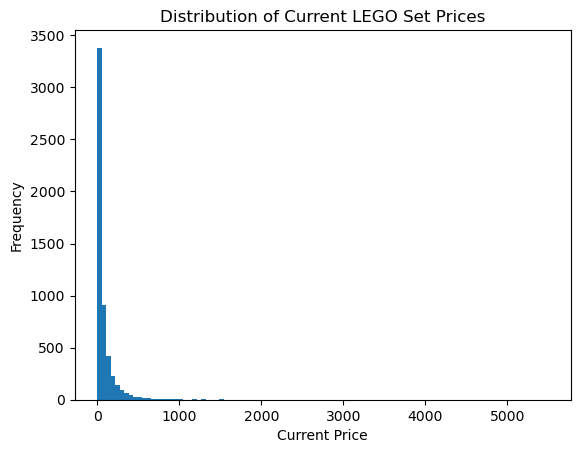

In [9]:
plt.hist(df["Current_Price"].dropna(), bins=100)
plt.title("Distribution of Current LEGO Set Prices")
plt.xlabel("Current Price")
plt.ylabel("Frequency")
plt.show()




The distribution of current resale prices is highly right-skewed, with a small number of sets achieving extremely high resale values. This behavior is typical of collectible markets and suggests that raw price values may violate assumptions of linear regression.


## Relationships Between Features and Aftermarket Performance

This section explores how key LEGO set characteristics relate to aftermarket performance.


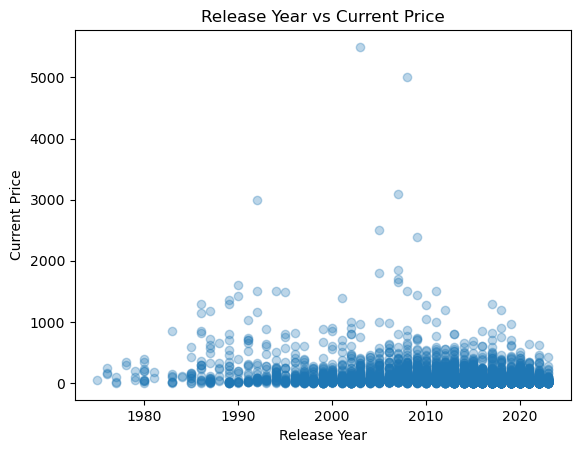

In [8]:
plt.scatter(df["Year"], df["Current_Price"], alpha=0.3)
plt.xlabel("Release Year")
plt.ylabel("Current Price")
plt.title("Release Year vs Current Price")
plt.show()




Relationships between LEGO set characteristics and resale prices appear nonlinear and influenced by interactions between variables. This suggests that simple linear models may not fully capture resale behavior and motivates the use of ensemble-based models such as Random Forest.


## Summary of EDA Findings and Implications

Key findings from exploratory data analysis include:

- Rows missing MSRP or current resale price cannot support the target variable and must be removed.
- Missing minifigure values likely represent valid zero-count sets and should be imputed as zero.
- Resale prices exhibit strong right skew and extreme values.
- Feature relationships are nonlinear and interaction-driven.

These findings directly inform:
- Data cleaning decisions in `make_dataset.py`
- Feature engineering choices
- The use of log-transformed regression
- The selection of Random Forest models

The EDA confirms that preprocessing and modeling decisions are grounded in observed data behavior rather than arbitrary assumptions.
